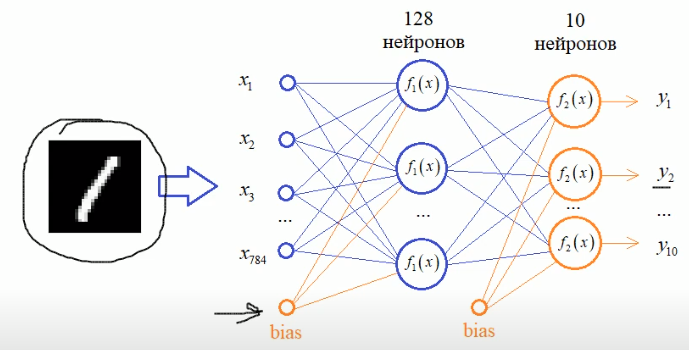

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout

2022-06-24 08:18:06.662144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


2022-06-24 08:18:07.142490: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-06-24 08:18:07.142539: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-06-24 08:18:07.142545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [3]:
from tensorflow.keras.datasets import mnist
# 60000 в обучающей выборке и 10к в тестовой

In [40]:
# x_train - изображение цифр обучающей выборки
# y_train - вектор, соотвутствующий значений цифр

# каждое изображение имеет размер 28x28 пикселей и 
# представлено в градациях серого, где 0 - черный, 255 - белый
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [41]:
# Попытаемся реализовать НС с архитектурой полносвязной НС.

# т.к изображение 28х28, то на входе будет 784 входа
# скрытый слой 128 нейронов, функция активации ReLu
# выходной слой 10 нейронов (10 цифр), функция активации softmax




In [42]:

# Нормализация входных данных

x_train = x_train / 255
x_test = x_test / 255

In [43]:
# Преобразование выходные значений в векторы по категориям

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

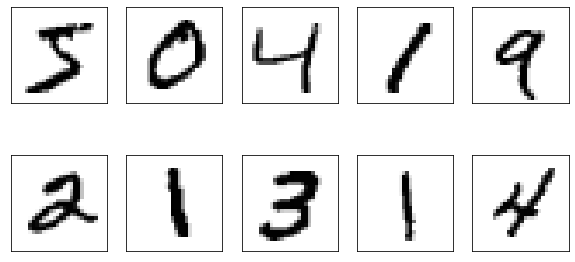

In [44]:
# Отображение первых 10 изображений из обучающей выборки

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

In [45]:
# Flatten(input_shape(28, 28, 1)) подаст на вход нашей изоюражение в виде вектора, будет подавать построчно считывать

In [46]:
# Формирование модели НС и вывод ее структуры в консоль

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    #Dropout(0.8),
    Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [47]:
# Компиляция НС с оптимизацией по Adam и функцией потерь - категриальная кросс-ентропия

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']) # эта метрика точности

In [48]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

# validation_split=0.2 означает, что берем 20% картинок из обучающей выборки и перемещать в выборку валидации 

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2950 - accuracy: 0.9155 - val_loss: 0.1758 - val_accuracy: 0.9498
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1325 - accuracy: 0.9617 - val_loss: 0.1202 - val_accuracy: 0.9664
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0905 - accuracy: 0.9736 - val_loss: 0.1030 - val_accuracy: 0.9691
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0669 - accuracy: 0.9795 - val_loss: 0.0909 - val_accuracy: 0.9727
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0509 - accuracy: 0.9851 - val_loss: 0.0811 - val_accuracy: 0.9758


In [49]:
# подадим теперь тестовую выборку на вход

model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 0s 975us/step - loss: 0.0734 - accuracy: 0.9765


[0.07339943945407867, 0.9764999747276306]

In [50]:
# Проверка распознавания  цифр

n = 1 # первое изображение
x = np.expand_dims(x_test[n], axis=0) #добавляе новое измерение, чтобы получился тензо
# поскольку на вход predict идут тензоры
res = model.predict(x)

1/1 [==============================] - 0s 41ms/step


In [37]:
print(np.argmax([1, 2, 5])) # возвращает индекс максимального элемента

2


[[1.4293937e-07 2.3404049e-05 9.9983203e-01 1.3181681e-04 1.0612026e-14
  1.5185411e-06 3.6157988e-07 3.9359445e-12 1.0713580e-05 3.5662083e-12]]
Распознанная цифра: 2


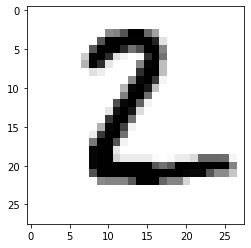

In [51]:
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [52]:
# Распознавание всей выборки

pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred[:20])
print(y_test[:20]) # проверяем первые 20 значений предсказанных и в тестовой

313/313 [==============================] - 0s 836us/step
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [63]:
# На прошлом шаге были неверные ответы, выделим их:

mask = pred == y_test # вернет True, если равны и наоборот
print(mask[0:20])
~mask[0:20] # инвертируем 

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True]


array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [66]:
# выделяем неверные ответы
x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape) # 235 из 10000 изображение распознали неверно

(235, 28, 28)


Значение сети: 7


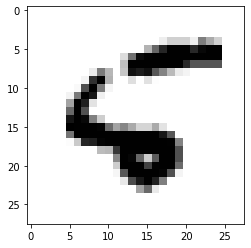

Значение сети: 2


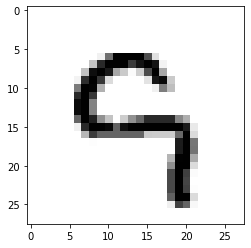

In [72]:
# Посмотрим, что это за изображения распознала сеть неправльно:

for i in range(2):
    print('Значение сети: '+ str(y_test[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

7